In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters Vector

Load and normalization vector of parameters.

In [32]:
allpatients = pd.read_csv('TimeFreq_Female.csv')
allpatients.head()

,MFCC1,MFCC2,MFCC3,MCCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,RMS,ZCR,F0,MAX,MIN,KURTOSIS,SKEWNESS,Status
0,-293.430239,101.862316,13.292425,-34.615979,-13.981128,15.430809,14.811644,11.609699,-22.399024,31.506209,0.100478,0.023600,219.746093,0.204873,-0.270142,-1.150720,-0.297840,Zdrowy
1,-163.370591,98.608829,-54.268960,-7.933267,-41.739898,-7.358411,0.884989,-18.851250,-1.047138,12.280790,0.265551,0.066284,746.748472,0.599240,-0.686358,-0.455155,-0.192974,Zdrowy
2,-241.858335,139.226006,-40.755116,-14.336575,-9.495435,-4.305301,11.620185,2.562133,-9.844266,13.291225,0.156921,0.043446,248.259388,0.425534,-0.324867,-0.474273,0.550839,Zdrowy
3,-211.005611,126.482252,-18.056063,-31.040735,-4.248392,-7.870706,15.085091,11.018850,-27.695277,17.300901,0.098562,0.041143,185.977739,0.377677,-0.407918,0.239410,0.580150,Zdrowy
4,-240.771690,141.427767,11.414391,-22.297131,-34.254011,-4.837738,6.969184,13.073304,-4.206142,-6.538549,0.145529,0.034362,188.165510,0.365738,-0.409941,-0.941252,0.352707,Zdrowy


Features has diffrent rows, so they have to be normalized.

In [4]:
features = allpatients.drop(labels='Status',axis=1).columns
for i in features:
    allpatients[i] = (allpatients[i] - np.mean(allpatients[i]))/np.std(allpatients[i])
allpatients.head()

,MFCC1,MFCC2,MFCC3,MCCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,RMS,ZCR,F0,MAX,MIN,KURTOSIS,SKEWNESS,Status
0,-2.053923,-1.247797,1.830072,-0.804297,0.808922,1.263011,0.432243,0.768103,-0.791289,2.442233,-1.274802,-1.722812,-0.774299,-1.841091,1.135021,-1.338427,-1.452019,Zdrowy
1,1.342852,-1.391763,-1.108474,1.185547,-0.956149,-0.514637,-0.623646,-1.698246,1.255177,0.708740,1.860417,0.943735,1.114584,0.563290,-1.023943,-0.576274,-1.209383,Zdrowy
2,-0.707017,0.405535,-0.520697,0.708025,1.094150,-0.276482,0.190273,0.035544,0.412019,0.799847,-0.202791,-0.482999,-0.672102,-0.495764,0.851157,-0.597222,0.511617,Zdrowy
3,0.098765,-0.158372,0.466586,-0.537676,1.427789,-0.554598,0.452975,0.720263,-1.298906,1.161387,-1.311192,-0.626910,-0.895332,-0.787539,0.420362,0.184784,0.579435,Zdrowy
4,-0.678637,0.502963,1.748387,0.114372,-0.480151,-0.318015,-0.162356,0.886608,0.952403,-0.988139,-0.419156,-1.050521,-0.887490,-0.860327,0.409866,-1.108907,0.053187,Zdrowy


Afterwards data have to be suffled, in order to avoid overfitting

In [5]:
allpatients = allpatients.sample(frac=1).reset_index(drop=True)
allpatients.head()

,MFCC1,MFCC2,MFCC3,MCCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,RMS,ZCR,F0,MAX,MIN,KURTOSIS,SKEWNESS,Status
0,-1.200474,-0.342671,0.731945,-0.212205,1.509658,-0.870927,0.186817,-0.840555,-0.400395,0.574415,-0.846094,-1.352722,-0.683430,-0.412520,1.540580,0.621242,2.245328,Zdrowy
1,-0.338501,1.486248,-0.192661,0.077375,1.057274,-1.319925,-0.595875,0.508172,0.401351,0.201290,-0.818887,0.159390,0.454141,-0.845265,0.701297,0.233816,0.125921,Chory
2,1.047280,-0.299224,-0.388901,0.656053,-0.292233,-0.340553,0.279434,-0.151975,-0.188860,-0.113603,-0.445499,0.328684,-0.508256,0.399273,0.576571,0.844270,1.531908,Zdrowy
3,-2.319827,0.952231,-0.442399,1.066943,-0.651871,-2.091328,0.713066,0.672745,-0.796425,0.253443,-2.124570,-0.217548,1.287330,-2.021436,1.684571,0.726128,0.288322,Zdrowy
4,-1.372526,1.700110,0.172627,-0.329923,0.822360,0.377548,-0.578837,1.816604,-0.177314,-0.690179,-0.816186,-0.770935,-0.932570,-1.240575,0.922685,-1.178676,-0.278913,Chory


# PCA

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=3)
pca.fit(allpatients.drop(['Status'], axis=1))
X = pca.transform(allpatients.drop(['Status'], axis=1))
X = pd.DataFrame(X, columns=['A','B','C'])
X['Status'] = allpatients['Status']

In [8]:
from mpl_toolkits.mplot3d import Axes3D

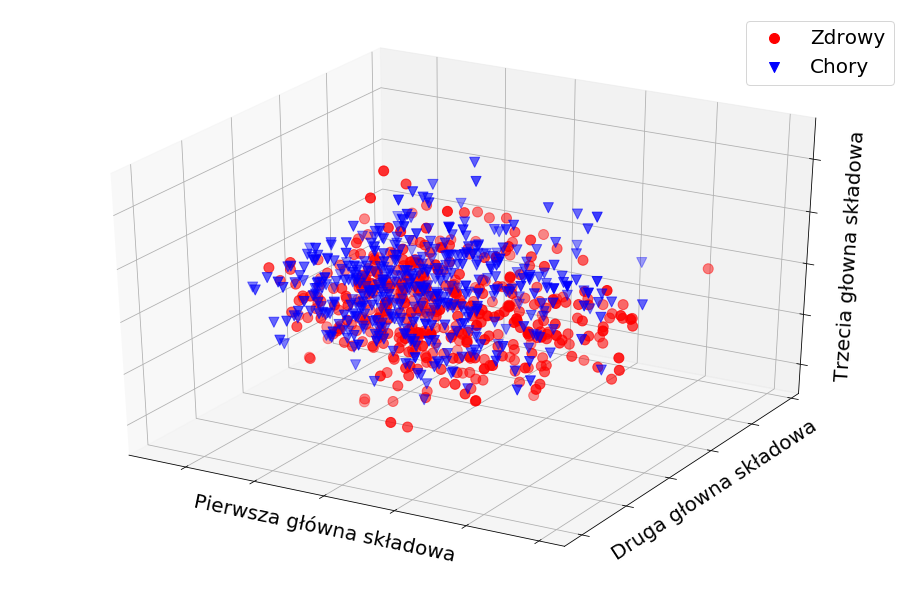

In [9]:
fig = plt.figure()
fig.set_size_inches(16, 10.5)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[X['Status']=='Zdrowy']['A'],
           X[X['Status']=='Zdrowy']['B'],
           X[X['Status']=='Zdrowy']['C'],
           s=100,
           c='r',
           marker='o',
           label='Zdrowy')
ax.scatter(X[X['Status']=='Chory']['A'],
           X[X['Status']=='Chory']['B'],
           X[X['Status']=='Chory']['C'],
           s=100,
           c='b',
           marker='v',
           label='Chory')
plt.legend(loc='upper right', frameon = True, fontsize=20)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])
ax.set_xlabel('Pierwsza główna składowa', fontsize=20)
ax.set_ylabel('Druga głowna składowa', fontsize=20)
ax.set_zlabel('Trzecia głowna składowa', fontsize=20)
plt.show()

# Dummy variables
We'll need to convert categorical features (Status) to dummy variables, because our alghoritm can't understant what means 'healthy'.

In [10]:
status = pd.get_dummies(allpatients['Status'],drop_first=True)

In [11]:
allpatients.drop(['Status'],axis=1,inplace=True)

In [12]:
allpatients['Chory'] = status
allpatients.head()

,MFCC1,MFCC2,MFCC3,MCCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,RMS,ZCR,F0,MAX,MIN,KURTOSIS,SKEWNESS,Chory
0,-1.200474,-0.342671,0.731945,-0.212205,1.509658,-0.870927,0.186817,-0.840555,-0.400395,0.574415,-0.846094,-1.352722,-0.683430,-0.412520,1.540580,0.621242,2.245328,1
1,-0.338501,1.486248,-0.192661,0.077375,1.057274,-1.319925,-0.595875,0.508172,0.401351,0.201290,-0.818887,0.159390,0.454141,-0.845265,0.701297,0.233816,0.125921,0
2,1.047280,-0.299224,-0.388901,0.656053,-0.292233,-0.340553,0.279434,-0.151975,-0.188860,-0.113603,-0.445499,0.328684,-0.508256,0.399273,0.576571,0.844270,1.531908,1
3,-2.319827,0.952231,-0.442399,1.066943,-0.651871,-2.091328,0.713066,0.672745,-0.796425,0.253443,-2.124570,-0.217548,1.287330,-2.021436,1.684571,0.726128,0.288322,1
4,-1.372526,1.700110,0.172627,-0.329923,0.822360,0.377548,-0.578837,1.816604,-0.177314,-0.690179,-0.816186,-0.770935,-0.932570,-1.240575,0.922685,-1.178676,-0.278913,0


# Train test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(allpatients.drop(['Chory'], axis=1), 
                                                    allpatients['Chory'], 
                                                    test_size=0.20, 
                                                    random_state=42)

# Logistic Regression Algorithm

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logModel = LogisticRegression(max_iter=1000, C = 0.01, solver='liblinear')
logModel.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
prediction = logModel.predict(X_test)

# Evaluation
Check precission, recall, f1-score using classification report

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71        86
           1       0.70      0.74      0.72        86

   micro avg       0.72      0.72      0.72       172
   macro avg       0.72      0.72      0.71       172
weighted avg       0.72      0.72      0.71       172



In [20]:
print(confusion_matrix(y_test,prediction))

[[59 27]
 [22 64]]


# Random Forest Algorithm

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
clf = RandomForestClassifier(n_estimators=400)

In [23]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
prediction = clf.predict(X_test)

# Evaluation
Check precission, recall, f1-score using classification report

In [25]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70        86
           1       0.70      0.71      0.71        86

   micro avg       0.70      0.70      0.70       172
   macro avg       0.70      0.70      0.70       172
weighted avg       0.70      0.70      0.70       172



In [26]:
print(confusion_matrix(y_test,prediction))

[[60 26]
 [25 61]]


In [27]:
feature_importance = clf.feature_importances_

[Text(0,0,'MFCC1'),
 Text(0,0,'MFCC2'),
 Text(0,0,'MFCC3'),
 Text(0,0,'MCCC4'),
 Text(0,0,'MFCC5'),
 Text(0,0,'MFCC6'),
 Text(0,0,'MFCC7'),
 Text(0,0,'MFCC8'),
 Text(0,0,'MFCC9'),
 Text(0,0,'MFCC10'),
 Text(0,0,'RMS'),
 Text(0,0,'ZCR'),
 Text(0,0,'F0'),
 Text(0,0,'Maks'),
 Text(0,0,'Min'),
 Text(0,0,'Kurt'),
 Text(0,0,'Skos')]

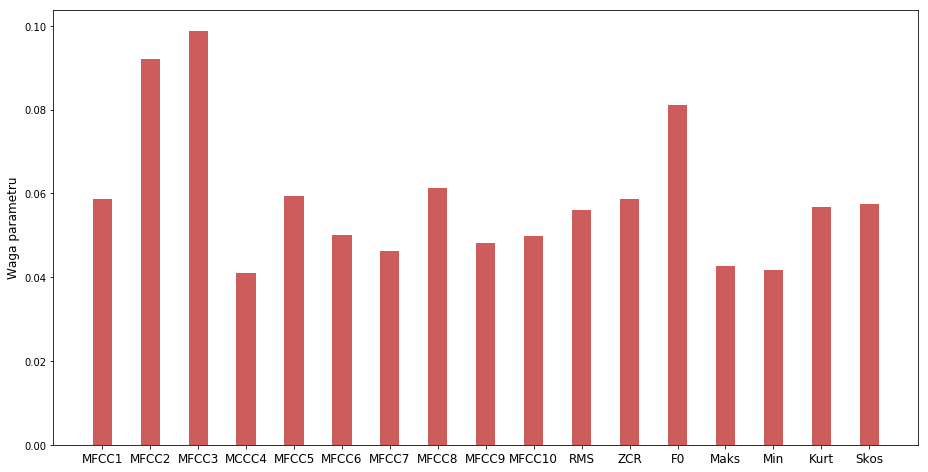

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(15.5, 8)
plt.grid(b=False)
ind = np.arange(len(feature_importance))  # the x locations for the groups
width = 0.4  # the width of the bars
ax.bar(ind, feature_importance, width, color='IndianRed')
ax.set_ylabel('Waga parametru', fontsize=12)
ax.set_xticks(ind)
ax.set_xticklabels(['MFCC1', 'MFCC2', 'MFCC3', 'MCCC4', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8',
       'MFCC9', 'MFCC10', 'RMS', 'ZCR', 'F0', 'Maks', 'Min', 'Kurt',
       'Skos'], fontsize=12)

In [30]:
clf.feature_importances_

array([0.05858517, 0.09208046, 0.09883162, 0.04109639, 0.0592858 ,
       0.05015795, 0.04614054, 0.06117025, 0.04822381, 0.04994085,
       0.05597525, 0.05875444, 0.08118257, 0.04268151, 0.04166638,
       0.05676   , 0.05746701])